# Heart Disease
> Sklearn and Kneighborclassifier.

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]
- image: images/chart-preview.png

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('/home/aswin/data/heart/heart_disease_health_indicators_BRFSS2015.csv')
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
x = data.iloc[:, 1:].values
y = data["HeartDiseaseorAttack"]
x
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
253675    0.0
253676    0.0
253677    0.0
253678    0.0
253679    1.0
Name: HeartDiseaseorAttack, Length: 253680, dtype: float64

In [5]:
nomi_col=[2,6,10]
ordi_col=[1,8]
num_col=[0,3,4,5,7,9]

In [6]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn import set_config
trans = make_column_transformer((OneHotEncoder(sparse=False),nomi_col),(OrdinalEncoder(),ordi_col),(StandardScaler(),num_col),remainder="passthrough")
set_config(display="diagram")
trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(sparse=False),
                                 [2, 6, 10]),
                                ('ordinalencoder', OrdinalEncoder(), [1, 8]),
                                ('standardscaler', StandardScaler(),
                                 [0, 3, 4, 5, 7, 9])])

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
Model = KNeighborsClassifier(11)
pipe = make_pipeline(trans,Model)
Model

KNeighborsClassifier(n_neighbors=11)

In [9]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2, 6, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1, 8]),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  [0, 3, 4, 5, 7, 9])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=11))])

In [10]:
pred = pipe.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.9054714601072217

In [18]:
from sklearn.linear_model import Perceptron
x2=data.loc[:,["HighBP", "Age"]]
y2=np.int_(data.HeartDiseaseorAttack)
prc=Perceptron(class_weight="balanced")
prc.fit(x2,y2)

Perceptron(class_weight='balanced')

/home/aswin/anaconda3/envs/jina/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<AxesSubplot:>

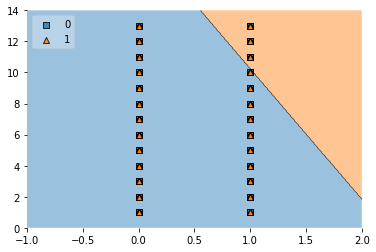

In [22]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x2.values,y2,clf=prc,legend=2)

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear")
pipe2=make_pipeline(trans,model)
pipe2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2, 6, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1, 8]),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  [0, 3, 4, 5, 7, 9])])),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [24]:
pipe2.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2, 6, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1, 8]),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  [0, 3, 4, 5, 7, 9])])),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [25]:
pred2=pipe2.predict(x_test[:1111])

In [27]:
accuracy_score(pred2,y_test[:1111])

0.9063906390639064

In [28]:
from sklearn.svm import SVC
alg=SVC()
pipe3=make_pipeline(trans,alg)
pipe3

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2, 6, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1, 8]),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  [0, 3, 4, 5, 7, 9])])),
                ('svc', SVC())])

In [29]:
pipe3.fit(x_train,y_train)

In [1]:
import seaborn as sns
sns.countplot(y)

NameError: name 'y' is not defined